# Device Creation
### initialize_device()
This generates the device from the parameters in this file and generates a mesh
### draw_device()
This draws the device regions without meshing
### draw_mesh()
This draws the device meshes for both islands

In [7]:
import tdgl
from tdgl.geometry import box, circle
import matplotlib.pyplot as plt

In [2]:
# Lambda value extracted from Jian's data from 03/13/2024

jj_length = 260e-9 #m
jj_width = 2000e-9 #m
jj_bz_min = 2e-3 #T
phi0 = 2.067833848e-15 #Wb

jj_flux = phi0
jj_area=jj_flux/jj_bz_min
jj_length_eff = jj_area/jj_width
jj_lambda= (jj_length_eff-jj_length)/2

electrode_width = 0.3 #um
hole_size = 0.8 #um

junction_length = 0.110 #um, 120 by design, 100-110 in real device.

length_units = "um"
# Material parameters
xi = 0.2
d = 0.1
big_lambda = 0.3


london_lambda = jj_lambda*1e6 #np.sqrt(d*big_lambda)


layer = tdgl.Layer(coherence_length=xi, london_lambda=london_lambda, thickness=d, gamma=1)

t_island = None
antidot_island = None

In [9]:
def initialize_device(reinitialize_if_exists=False):
    global electrode_width, hole_size, layer, junction_length, t_island, antidot_island
    if(not(t_island is None) and not(antidot_island is None) and not(reinitialize_if_exists)):
        return

    # Top Right Notch
    right_notch = (
        tdgl.Polygon("right_notch", points=box((electrode_width+hole_size)/2, electrode_width+hole_size))
        .translate(dx=(electrode_width*3+hole_size)/3.9, dy=electrode_width/1.9999)
        .resample(401)

    )

    # Top Left Notch
    left_notch = (
        tdgl.Polygon("right_notch", points=box((electrode_width+hole_size)/2, electrode_width+hole_size))
        .translate(dx=-(electrode_width*3+hole_size)/3.9, dy=electrode_width/1.9999)
        .resample(401)
    )

    # Total film for T Island
    t_film = (
        tdgl.Polygon("film", points=box(electrode_width*2+hole_size, electrode_width*2+hole_size))
        .difference(right_notch, left_notch)
        .resample(401)
    )

    # Final T Island region
    t_island = tdgl.Device(
        "t_island",
        layer=layer,
        film=t_film,
    )
    
    # Antidot Hole
    square_hole = (
        tdgl.Polygon("square_hole", points=box(hole_size, hole_size))
        .translate(dy=-(2*electrode_width+hole_size+junction_length))
        .resample(401)
    )
    
    # Total film for antidot island without hole removed
    antidot_film = (
        tdgl.Polygon("film", points=box(electrode_width*2+hole_size, electrode_width*2+hole_size))
        .translate(dy=-(2*electrode_width+hole_size+junction_length))
        .resample(401)
    )

    # Final antidot Island region
    antidot_island = tdgl.Device(
        "antidot_island",
        layer=layer,
        film=antidot_film,
        holes=[square_hole],
    )

    antidot_island.make_mesh(max_edge_length=xi / 2, smooth=100)    
    t_island.make_mesh(max_edge_length=xi / 2, smooth=100)

In [10]:
def draw_device():
    global t_island, antidot_island
    #Ensure device initialized
    initialize_device()

    # Plot the T island portion of the device
    fig, ax = t_island.draw()
    xlim_1 = ax.get_xlim()
    ylim_1 = ax.get_ylim()

    # Plot the antidot island portion of the device
    fig, ax = antidot_island.draw(ax=ax)
    xlim_2 = ax.get_xlim()
    ylim_2 = ax.get_ylim()

    # Calculate the combined limits since 
    x_min = min(xlim_1[0], xlim_2[0])
    x_max = max(xlim_1[1], xlim_2[1])
    y_min = min(ylim_1[0], ylim_2[0])
    y_max = max(ylim_1[1], ylim_2[1])

    # Set the new limits to include both islands
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.show()

In [11]:
def draw_mesh():
    global t_island, antidot_island
    initialize_device() #Ensure device initialized

    # Plot the T island portion of the device
    fig, ax = t_island.plot(mesh=True, legend=False)
    xlim_1 = ax.get_xlim()
    ylim_1 = ax.get_ylim()

    # Plot the antidot island portion of the device
    fig, ax = antidot_island.plot(mesh=True, legend=False, ax=ax)
    xlim_2 = ax.get_xlim()
    ylim_2 = ax.get_ylim()

    # Calculate the combined limits since 
    x_min = min(xlim_1[0], xlim_2[0])
    x_max = max(xlim_1[1], xlim_2[1])
    y_min = min(ylim_1[0], ylim_2[0])
    y_max = max(ylim_1[1], ylim_2[1])

    # Set the new limits to include both islands
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.show()

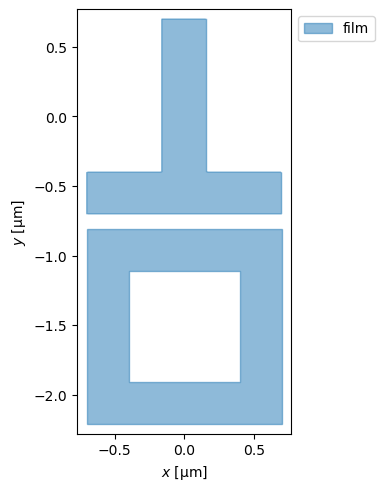

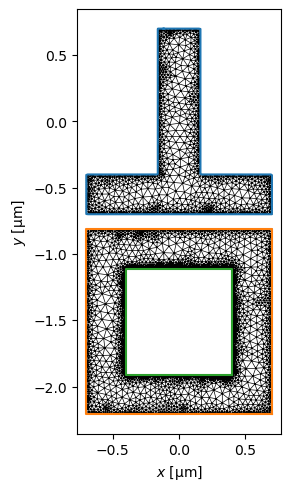

In [15]:
initialize_device(True)
draw_device()
draw_mesh()